# Bird Species Classification
This notebook aims to classify different bird species using Convolutional Neural Network.

# Downloading the Dataset

In [1]:
!kaggle datasets download rahmasleam/bird-speciees-dataset

Dataset URL: https://www.kaggle.com/datasets/rahmasleam/bird-speciees-dataset
License(s): apache-2.0
 79% 12.0M/15.2M [00:00<00:00, 20.9MB/s]
100% 15.2M/15.2M [00:00<00:00, 16.2MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('bird-speciees-dataset.zip', 'r') as zip_re:
    zip_re.extractall('bird-species-dataset')

# Importing the Libraries

In [15]:
import os
import numpy as np
import random
import shutil
import matplotlib.pyplot as plt
import cv2

from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout,Flatten,Dense,Conv2D,MaxPooling2D, Input

# Spliting the Data into Test and Train

In [4]:
# Defining the Paths

dataset_dir = 'bird-species-dataset/Bird Speciees Dataset'
train_dir = 'bird-species-dataset/Train'
test_dir = 'bird-species-dataset/Test'

In [5]:
# Creating the Test and Train Directory
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir,exist_ok=True)

In [6]:
# Define the split ratio
split_ratio = 0.8

# Iterate through each bird species folder
for bird_species in os.listdir(dataset_dir):
    species_folder = os.path.join(dataset_dir, bird_species)

    # Check if the current path is a directory
    if os.path.isdir(species_folder):
        # List all images in the species folder
        images = os.listdir(species_folder)
        # Shuffle the images to ensure randomness
        random.shuffle(images)

        # Split the Data
        split_point = int(len(images) * split_ratio)
        train_images = images[:split_point]
        test_images = images[split_point:]

        # Create species folder in train and test directories
        train_species_folder = os.path.join(train_dir, bird_species)
        test_species_folder = os.path.join(test_dir, bird_species)

        os.makedirs(train_species_folder, exist_ok=True)
        os.makedirs(test_species_folder, exist_ok=True)

        # Copy images to the training set
        for image in train_images:
            src = os.path.join(species_folder, image)
            dst = os.path.join(train_species_folder, image)
            shutil.copyfile(src, dst)

        # Copy images to the testing set
        for image in test_images:
            src = os.path.join(species_folder, image)
            dst = os.path.join(test_species_folder, image)
            shutil.copyfile(src, dst)

# Confirmation message
print("Data has been split between test and train successfully")

Data has been split between test and train successfully


# Defining Image Shape and Data Augmentation

In [7]:
# Define the image shape
image_shape = (150, 150, 3)

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # shift the pic width by max of 10%
                               height_shift_range=0.1, # shift the pic height by max of 10%
                               rescale=1/255, #Rescaling the image by normalizing it
                               shear_range=0.2, #Cutting away part of image (max 20%)
                               zoom_range=0.2, # Zoom in by max 20%
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               )

# Defining the CNN Model

In [8]:
# Initialize the Sequential model
model = Sequential()

# First layer: Input layer
model.add(Input(shape=image_shape))
# First convolutional layer: extracts features from the input images
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# First max pooling layer: reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer: captures more complex features
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Second max pooling layer: further reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer: continues feature extraction
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Third max pooling layer: reduces spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output: converts 2D feature maps into a 1D vector
model.add(Flatten())

# Fully connected layer: learning complex representations
model.add(Dense(128))
# Activation function: introduces non-linearity
model.add(Activation('relu'))

# Dropout layer: helps prevent overfitting
model.add(Dropout(0.5))

# Output layer: 6 neurons for 6 bird species
model.add(Dense(6))
# Activation function: softmax for multi-class classification
model.add(Activation('softmax'))

# Compile the model: specifying loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 6)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,424,710 (9.25 MB)

 Trainable params: 2,424,710 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

# Setting Up Image Data Generators for Training and Testing

In [10]:
batch_size = 16

# Train Image Generator for multi-class classification
train_image_gen = image_gen.flow_from_directory(train_dir,
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='categorical'  # For multi-class
                                                )

test_image_gen = image_gen.flow_from_directory(test_dir,
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 646 images belonging to 6 classes.
Found 165 images belonging to 6 classes.


In [11]:
train_image_gen.class_indices

{'AMERICAN GOLDFINCH': 0,
 'BARN OWL': 1,
 'CARMINE BEE-EATER': 2,
 'DOWNY WOODPECKER': 3,
 'EMPEROR PENGUIN': 4,
 'FLAMINGO': 5}

# Training the Model

In [12]:
result = model.fit(train_image_gen,
                              epochs=100,
                              steps_per_epoch=40, #steps_per_epoch = Total_Images// BatchSize
                              validation_data=test_image_gen,
                              validation_steps=10) # Val Steps = Total_Images // Batchsize

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - accuracy: 0.2723 - loss: 1.7625 - val_accuracy: 0.5063 - val_loss: 1.2287
Epoch 2/100
 1/40 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3750 - loss: 1.2831

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.3750 - loss: 1.2831 - val_accuracy: 0.6000 - val_loss: 1.3275
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.6068 - loss: 1.0844 - val_accuracy: 0.7750 - val_loss: 0.5717
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7500 - loss: 0.5800 - val_accuracy: 1.0000 - val_loss: 0.4826
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.7393 - loss: 0.7041 - val_accuracy: 0.8438 - val_loss: 0.5225
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8750 - loss: 0.3479 - val_accuracy: 0.8000 - val_loss: 0.8512
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7845 - loss: 0.6107 - val_accuracy: 0.8625 - val_loss: 0.4716
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8750 - loss: 0.4690 - val_accuracy: 0.6000 - val_loss: 0.9712
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.8130 - loss: 0.4883 - val_accuracy: 0.8750 

# Evaluating the Model on Test Set

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_image_gen, steps=16)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9584 - loss: 0.1232
Test Loss: 0.1485
Test Accuracy: 0.9455


# Plotting the accuracy and loss

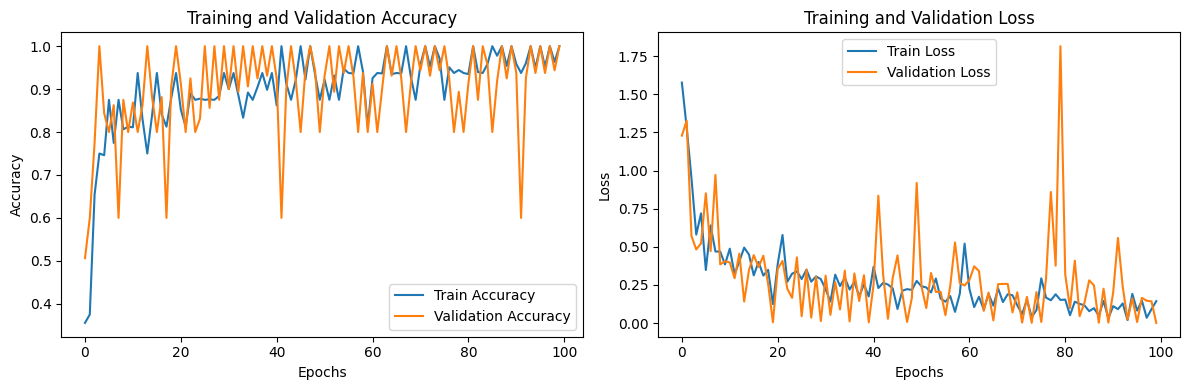

In [17]:
# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(result.history['accuracy'], label='Train Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(result.history['loss'], label='Train Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate Predictions on a Batch of Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


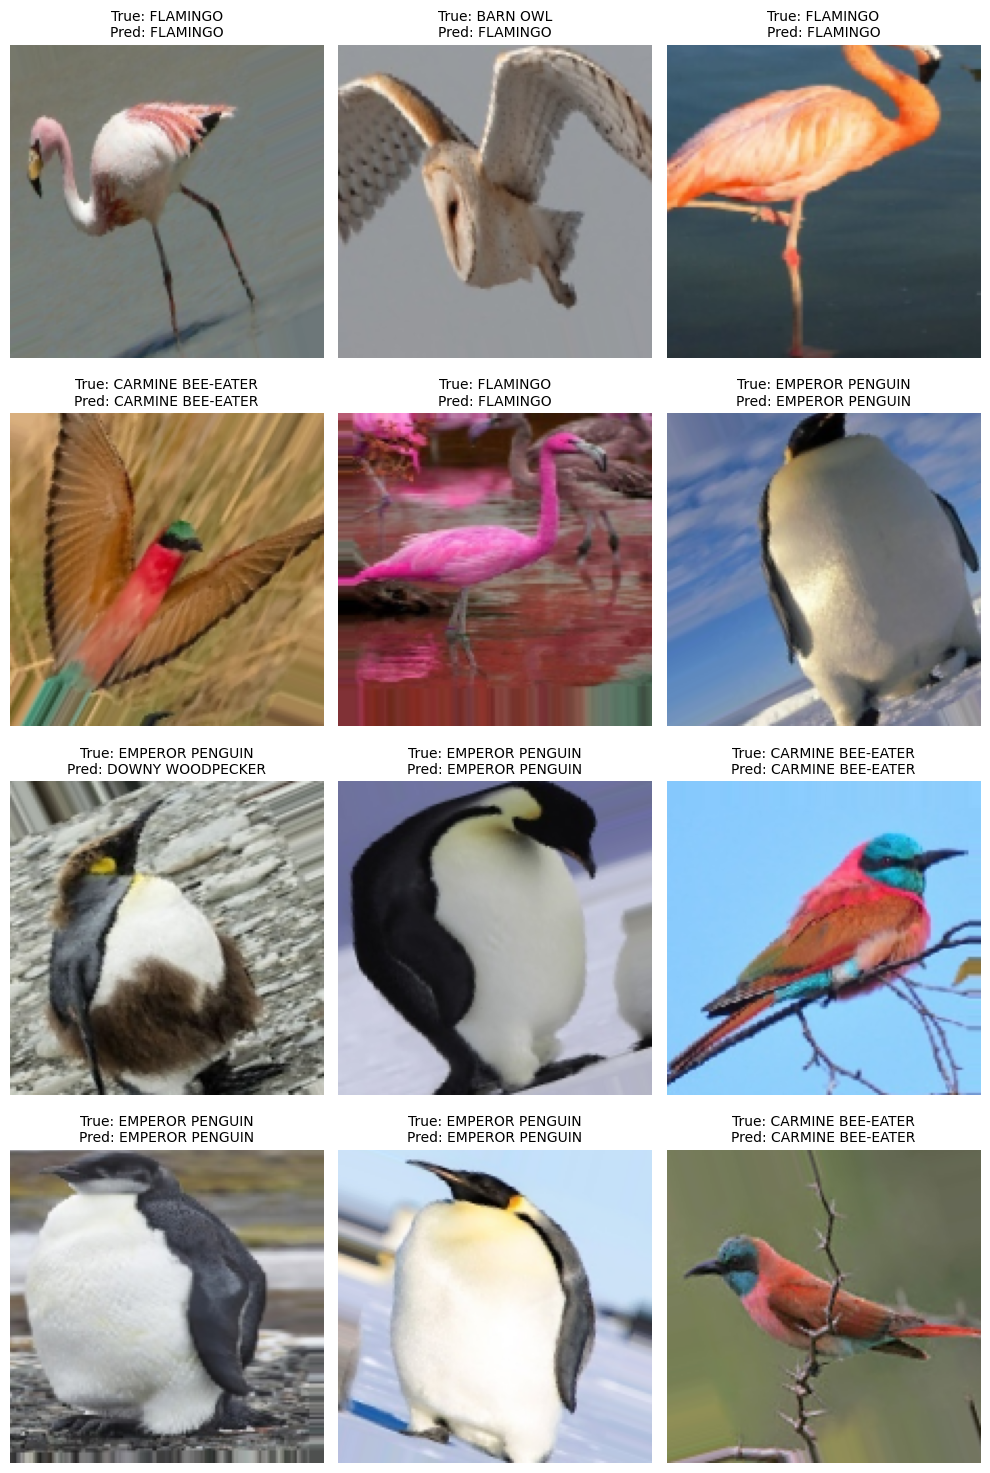

In [16]:
# Get a batch of test images and their true labels
X_test_batch, y_test_batch = next(test_image_gen)

# Make predictions for the batch
predictions = model.predict(X_test_batch)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_image_gen.class_indices.keys())

# Display the first image in the batch along with true and predicted labels
plt.figure(figsize=(10, 15))
for i in range(12):  # Display 5 images
    plt.subplot(4, 3, i + 1)
    plt.imshow(X_test_batch[i])
    plt.axis('off')  # Hide the axis
    true_label = class_labels[y_test_batch[i].argmax()]
    predicted_label = class_labels[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()